# Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, \
roc_auc_score, auc, f1_score, fbeta_score

In [2]:
original_df=pd.read_csv('Final_obesity_dataset.csv', index_col=0)
df=original_df.copy()
df

,Gender,Age,Height,Weight,fam_hist,high_cal_foods,veg,num_main_meals,food_between_meals,nicotine,...,physical_activity,time_using_tech_devices,alcohol,transportation,obesity_lvl,BMI,age_group,new_obesity_4lvls,obese,new_obesity_7lvls
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,0.0,...,0.0,1.0,0.0,1.0,Normal_Weight,24.387,1.0,1.0,0.0,1.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,1.0,...,3.0,0.0,1.0,1.0,Normal_Weight,24.238,1.0,1.0,0.0,1.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,0.0,...,2.0,1.0,2.0,1.0,Normal_Weight,23.765,2.0,1.0,0.0,1.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,1.0,0.0,...,2.0,0.0,2.0,2.0,Overweight_Level_I,26.852,3.0,2.0,1.0,2.0
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,Overweight_Level_II,28.342,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,1.0,25.0,1.66,68.0,0.0,1.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,Normal_Weight,24.677,3.0,1.0,0.0,1.0
492,1.0,45.0,1.70,86.0,0.0,1.0,3.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,Overweight_Level_II,29.758,3.0,2.0,1.0,3.0
494,0.0,18.0,1.67,66.0,0.0,1.0,3.0,3.0,1.0,0.0,...,0.0,0.0,1.0,1.0,Normal_Weight,23.665,0.0,1.0,0.0,1.0
496,1.0,18.0,1.72,53.0,1.0,1.0,2.0,3.0,1.0,0.0,...,0.0,2.0,1.0,1.0,Underweight,17.915,0.0,0.0,0.0,0.0


In [3]:
df.obesity_lvl.value_counts()

Normal_Weight          276
Overweight_Level_II     57
Overweight_Level_I      55
Obesity_Type_I          44
Underweight             34
Obesity_Type_II         10
Obesity_Type_III         3
Name: obesity_lvl, dtype: int64

In [4]:
df['obese'].value_counts()

0.0    310
1.0    169
Name: obese, dtype: int64

Since this dataset is imbalanced, accuracy might not be the best scoring method. We later split the train/test data 50/50 due to the small data size.

In [5]:
models=pd.DataFrame(index=['Logistic Regression', 'Random Forest Classifier', 'XGB Classifier'],\
                    columns=['Best_params', 'Optimal_features', 'ROC_AUC'])


## Logistic Regression

In [6]:
cols=['age_group', 'veg', 'num_main_meals', 'daily_water', 'physical_activity', 'time_using_tech_devices', 'food_between_meals', 'alcohol', 'Gender', 'fam_hist', 'high_cal_foods', 'cal_consumption_monitoring', 'nicotine', 'transportation']
X=df[cols]
y=df[['obese']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)

In [7]:
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
clf=LogisticRegression(random_state=16)
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_cv=GridSearchCV(clf, param_grid, scoring='roc_auc', cv=10)
logreg_cv.fit(X_train_scaled, y_train)
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.1}
Tuned Logistic Regression Score: 0.7216666666666667


In [9]:
cols=['age_group','fam_hist','physical_activity','daily_water','veg','food_between_meals','alcohol','nicotine']
X=df[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)

In [10]:
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
clf=LogisticRegression(random_state=16)
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_cv=GridSearchCV(clf, param_grid, scoring='roc_auc', cv=10)
logreg_cv.fit(X_train_scaled, y_train)
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))
models.Best_params[0]=logreg_cv.best_params_
models.Optimal_features[0]=cols
models.ROC_AUC[0]=logreg_cv.best_score_

Tuned Logistic Regression Parameter: {'C': 0.1}
Tuned Logistic Regression Accuracy: 0.7419444444444445


In [11]:
cols=['age_group','fam_hist','physical_activity','daily_water','veg','food_between_meals','alcohol','nicotine']
X=df[cols]
y=df[['obese']].values.ravel()

clf=LogisticRegression(C=100, random_state=16)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
y_pred_prob=clf.predict_proba(X_test_scaled)[:,1]
fpr0, tpr0, thresholds0 = roc_curve(y_test, y_pred_prob) 

## Random Forest Classifier

In [12]:
cols=['age_group', 'veg', 'num_main_meals', 'daily_water', 'physical_activity', 'time_using_tech_devices', 'food_between_meals', 'alcohol', 'Gender', 'fam_hist', 'high_cal_foods', 'cal_consumption_monitoring', 'nicotine', 'transportation']
X=df[cols]
y=df[['obese']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
param_grid={'n_estimators':[10, 50, 100, 300, 500, 700, 1000],
            'criterion':['gini', 'entropy'],
            'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':[None, 1, 3, 5, 7, 15, 30]}
clf=RandomForestClassifier(random_state=16)
random_forest_cv=GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

In [14]:
random_forest_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=16),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 3, 5, 7, 15, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 300, 500, 700, 1000]},
             scoring='roc_auc')

In [15]:
print("Tuned Random Forest Classifier Parameter: {}".format(random_forest_cv.best_params_))
print("Tuned Random Forest Classifier Score: {}".format(random_forest_cv.best_score_))

Tuned Random Forest Classifier Parameter: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}
Tuned Random Forest Classifier Score: 0.7381481481481481


In [16]:
cols=['age_group', 'fam_hist', 'physical_activity', 'daily_water', 'food_between_meals', 'veg', 'Gender', 'high_cal_foods']
X=df[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
param_grid={'n_estimators':[10, 50, 100, 300, 500, 700, 1000],
            'criterion':['gini', 'entropy'],
            'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':[None, 1, 3, 5, 7, 15, 30]}
clf=RandomForestClassifier(random_state=16)
random_forest_cv=GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

In [18]:
random_forest_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=16),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 3, 5, 7, 15, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 300, 500, 700, 1000]},
             scoring='roc_auc')

In [19]:
print("Tuned Random Forest Classifier Parameter: {}".format(random_forest_cv.best_params_))
print("Tuned Random Forest Classifier Score: {}".format(random_forest_cv.best_score_))

Tuned Random Forest Classifier Parameter: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}
Tuned Random Forest Classifier Score: 0.7564814814814815


In [20]:
models.Best_params[1]=random_forest_cv.best_params_
models.Optimal_features[1]=cols
models.ROC_AUC[1]=random_forest_cv.best_score_

Random Forest Classifier seems like a better model to use than Logistic Regression.

In [21]:
cols=['age_group', 'fam_hist', 'physical_activity', 'daily_water', 'food_between_meals', 'veg', 'Gender', 'high_cal_foods']
X=df[cols]
y=df[['obese']].values.ravel()

clf=RandomForestClassifier(random_state=16, criterion='entropy', max_depth=3, max_features='log2', n_estimators=50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
y_pred_prob=clf.predict_proba(X_test_scaled)[:,1]

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob) 

## Extreme Gradient Boosting

In [22]:
cols=['age_group', 'veg', 'num_main_meals', 'daily_water', 'physical_activity', 'time_using_tech_devices', 'food_between_meals', 'alcohol', 'Gender', 'fam_hist', 'high_cal_foods', 'cal_consumption_monitoring', 'nicotine', 'transportation']
X=df[cols]
y=df[['obese']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
param_grid={'n_estimators':[10, 50, 100, 300, 500],
            'max_depth':[1, 3, 15, None],
           'colsample_bytree':[0.1, 0.3, 0.5, 0.7, 1]}
clf=XGBClassifier(random_state=16, use_label_encoder=False, eval_metric='logloss')
xgb_cv=GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
xgb_cv.fit(X_train_scaled, y_train)
print("Tuned XGB Classifier Parameter: {}".format(xgb_cv.best_params_))
print("Tuned XGB Classifier Score: {}".format(xgb_cv.best_score_))

Tuned XGB Classifier Parameter: {'colsample_bytree': 0.1, 'max_depth': 3, 'n_estimators': 100}
Tuned XGB Classifier Score: 0.7469444444444444


In [24]:
cols=['age_group', 'fam_hist', 'physical_activity', 'Gender', 'daily_water']
X=df[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
param_grid={'n_estimators':[10, 50, 100, 300, 500],
            'max_depth':[1, 3, 5, 15, 30, None],
           'colsample_bytree':[0.1, 0.3, 0.5, 0.7, 1]}
clf=XGBClassifier(random_state=16, use_label_encoder=False, eval_metric='logloss')
xgb_cv=GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
xgb_cv.fit(X_train_scaled, y_train)
print("Tuned XGB Classifier Parameter: {}".format(xgb_cv.best_params_))
print("Tuned XGB Classifier Score: {}".format(xgb_cv.best_score_))

Tuned XGB Classifier Parameter: {'colsample_bytree': 1, 'max_depth': 1, 'n_estimators': 50}
Tuned XGB Classifier Score: 0.7501388888888888


In [26]:
models.Best_params[2]=xgb_cv.best_params_
models.Optimal_features[2]=cols
models.ROC_AUC[2]=xgb_cv.best_score_

XGB Classifier seems to be a good model, but Random Forest Classifier results in a slightly better score.

In [27]:
cols=['age_group', 'fam_hist', 'physical_activity', 'Gender', 'daily_water']
X=df[cols]
y=df[['obese']].values.ravel()
clf=XGBClassifier(colsample_bytree=1, max_depth=1, n_estimators=50, use_label_encoder=False, random_state=16)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
y_pred_prob=clf.predict_proba(X_test_scaled)[:,1]

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob) 

[20:51:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Conclusions

In [28]:
pd.set_option('display.max_colwidth', None)
models

,Best_params,Optimal_features,ROC_AUC
Logistic Regression,{'C': 0.1},"[age_group, fam_hist, physical_activity, daily_water, veg, food_between_meals, alcohol, nicotine]",0.741944
Random Forest Classifier,"{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}","[age_group, fam_hist, physical_activity, daily_water, food_between_meals, veg, Gender, high_cal_foods]",0.756481
XGB Classifier,"{'colsample_bytree': 1, 'max_depth': 1, 'n_estimators': 50}","[age_group, fam_hist, physical_activity, Gender, daily_water]",0.750139


The Random Forest Classifier has the highest ROC_AUC score, but they are all close in proximity.

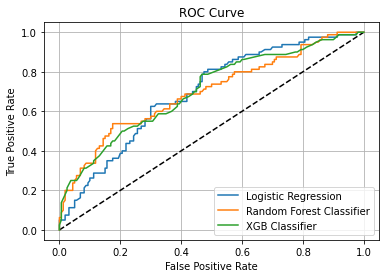

In [29]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr0, tpr0, label='Logistic Regression') 
plt.plot(fpr1, tpr1, label='Random Forest Classifier') 
plt.plot(fpr2, tpr2, label='XGB Classifier') 
plt.grid()
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve') 
plt.show()

The ROC curve reflects the closeness in ROC_AUC scores of the three models. However, although the random forest has the highest score, it only performs better around a false positive rate of 0.2, corresponding to a threshold of 0.8. Logistic Regression outperforms all levels at lower thresholds of less than 0.55 and more than 0.1.

# Thresholding

## Random Forest Classifier

In [30]:
cols=['age_group', 'fam_hist', 'physical_activity', 'daily_water', 'food_between_meals', 'veg', 'Gender', 'high_cal_foods']
X=df[cols]
y=df[['obese']].values.ravel()

In [31]:
clf=RandomForestClassifier(random_state=16, criterion='entropy', max_depth=3, max_features='log2', n_estimators=50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
y_pred_prob=clf.predict_proba(X_test_scaled)[:,1]

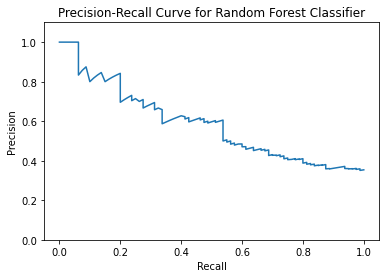

In [32]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_prob) # pos_labelstr - picks normal weight class
fig, ax=plt.subplots()
ax.plot(recall, precision)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve for Random Forest Classifier')
ax.set_ylim(0.0, 1.1)
plt.show()

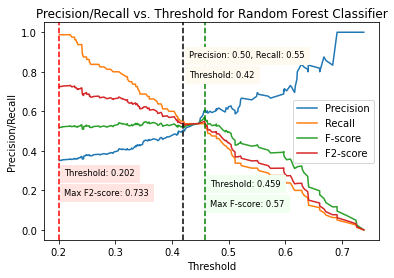

In [33]:
fig, ax=plt.subplots()
ax.plot(threshold, precision[1:], label='Precision')
ax.plot(threshold, recall[1:], label='Recall')


ax.set_xlabel('Threshold')
ax.set_ylabel('Precision/Recall')
ax.set_title('Precision/Recall vs. Threshold for Random Forest Classifier')

fscore=2*(precision*recall)/(precision+recall)
f_ix=np.argmax(fscore)

f2=fbeta_score(y_test, y_pred, beta=2)

f2score=(5*precision*recall)/((4*precision)+recall)

f2_ix=np.argmax(f2score)

ax.plot(threshold, fscore[1:], label='F-score')
ax.plot(threshold, f2score[1:], label='F2-score')

ax.axvline(threshold[f_ix], linestyle='dashed', color='green')
plt.text(threshold[f_ix]*1.02, 0.22, 'Threshold: '+str(np.round(threshold[f_ix], 3)), fontsize='small', backgroundcolor='honeydew')
plt.text(threshold[f_ix]*1.02, 0.12,  'Max F-score: '+str(np.round(fscore[f_ix], 3)), fontsize='small', backgroundcolor='honeydew')

ax.axvline(threshold[f2_ix], linestyle='dashed', color='red')
plt.text(threshold[f2_ix]*1.04, 0.275, 'Threshold: '+str(np.round(threshold[f2_ix], 3)), fontsize='small', backgroundcolor='mistyrose')
plt.text(threshold[f2_ix]*1.04, 0.175, 'Max F2-score: '+str(np.round(f2score[f2_ix], 3)), fontsize='small', backgroundcolor='mistyrose')

ax.axvline(0.42, linestyle='dashed', color='black')
plt.text(0.42*1.025, 0.872, 'Precision: 0.50, Recall: 0.55', fontsize='small', backgroundcolor='floralwhite')
plt.text(0.42*1.025, 0.775, 'Threshold: 0.42', fontsize='small', backgroundcolor='floralwhite')


ax.legend()
plt.show()



The threshold that best balances precision and recall is one that gives the maximum F-score, where $F=2\cdot\frac{precision \cdot recall}{precision+recall}=\frac{2\cdot TP}{2\cdot TP + FP + FN}$.


We generate a confusion matrix and a classification report for the threshold of 0.459 at the maximum F-score of 0.57:

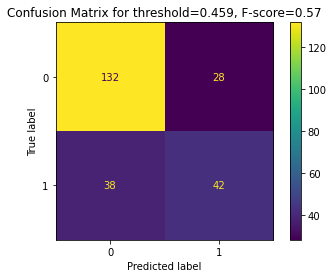

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       160
         1.0       0.60      0.53      0.56        80

    accuracy                           0.73       240
   macro avg       0.69      0.68      0.68       240
weighted avg       0.72      0.72      0.72       240



In [34]:
fthreshold = 0.459

y_pred = (y_pred_prob >= fthreshold).astype('int')

cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for threshold=0.459, F-score=0.57')
plt.show()
print(classification_report(y_test, y_pred))

$Precision=\frac{TP}{TP+FP}$, $Recall=\frac{TP}{TP+FN}$ 

Here, precision is 42/(42+28) and recall is 42/(42+38). Recall is lower than precision. The model predicts the negative class of normal weight more accurately because of the imbalance in the dataset. 

We want to minimize false negatives (false predictions that someone is under/normal weight when they are actually overweight/obese), because promoting healthy behaviour towards overweight patients is more important than doing so towards people who are normal weight. We can look at the F2-score, where $F_2=\frac{(1+\beta^2)\cdot Precision\cdot Recall}{(\beta^2 \cdot Precision+Recall)}$, $\beta = 2$. This puts more importance on recall and less on precision.


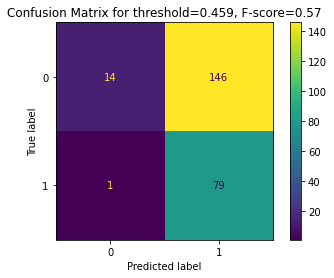

              precision    recall  f1-score   support

         0.0       0.93      0.09      0.16       160
         1.0       0.35      0.99      0.52        80

    accuracy                           0.39       240
   macro avg       0.64      0.54      0.34       240
weighted avg       0.74      0.39      0.28       240



In [35]:
f2threshold=0.202

y_pred = (y_pred_prob >= f2threshold).astype('int')

cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for threshold=0.459, F-score=0.57')
plt.show()
print(classification_report(y_test, y_pred))

For the F2-threshold, the recall is 0.99, but the precision is 0.35 - a value that is too low for the model to be accurate.

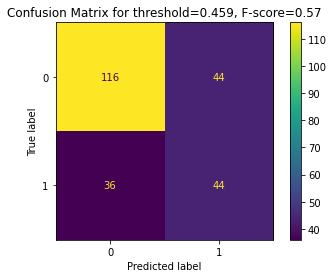

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74       160
         1.0       0.50      0.55      0.52        80

    accuracy                           0.67       240
   macro avg       0.63      0.64      0.63       240
weighted avg       0.68      0.67      0.67       240



In [36]:
fthreshold = 0.42

y_pred = (y_pred_prob >= fthreshold).astype('int')

cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for threshold=0.459, F-score=0.57')
plt.show()
print(classification_report(y_test, y_pred))

At 50% precision, recall is only 55%. Picking a threshold below this point (0.42) will result in a lower precision, which makes this model unuseful.

## Logistic Regression

The ROC curve above shows Logistic Regression performs better at lower thresholds. Because we are more interested in 

In [37]:
logreg_cols=cols=['age_group','fam_hist','physical_activity','daily_water','veg','food_between_meals','alcohol','nicotine']
X=df[logreg_cols]
y=df[['obese']].values.ravel()

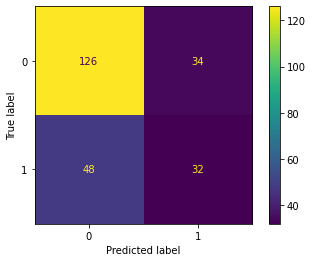

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       160
         1.0       0.48      0.40      0.44        80

    accuracy                           0.66       240
   macro avg       0.60      0.59      0.60       240
weighted avg       0.64      0.66      0.65       240



In [38]:
clf=LogisticRegression(C=100, random_state=16)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
y_pred_prob=clf.predict_proba(X_test_scaled)[:,1]
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.grid(False)
plt.show()
print(classification_report(y_test, y_pred))

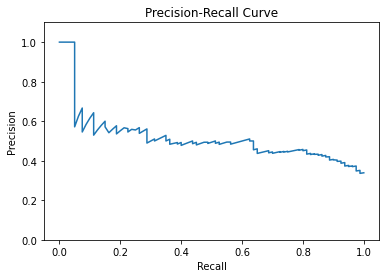

In [39]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_prob) # pos_labelstr - picks normal weight class
fig, ax=plt.subplots()
ax.plot(recall, precision)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.set_ylim(0.0, 1.1)
plt.show()

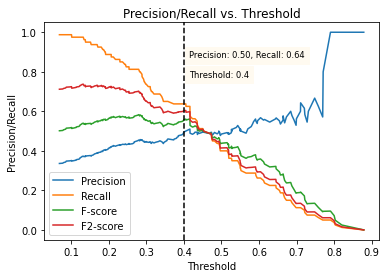

In [40]:
fig, ax=plt.subplots()
ax.plot(threshold, precision[1:], label='Precision')
ax.plot(threshold, recall[1:], label='Recall')


ax.set_xlabel('Threshold')
ax.set_ylabel('Precision/Recall')
ax.set_title('Precision/Recall vs. Threshold')

fscore=2*(precision*recall)/(precision+recall)
f_ix=np.argmax(fscore)

f2=fbeta_score(y_test, y_pred, beta=2)

f2score=(5*precision*recall)/((4*precision)+recall)

f2_ix=np.argmax(f2score)

ax.plot(threshold, fscore[1:], label='F-score')
ax.plot(threshold, f2score[1:], label='F2-score')

ax.axvline(0.4, linestyle='dashed', color='black')
plt.text(0.4*1.035, 0.872, 'Precision: 0.50, Recall: 0.64', fontsize='small', backgroundcolor='floralwhite')
plt.text(0.4*1.035, 0.775, 'Threshold: 0.4', fontsize='small', backgroundcolor='floralwhite')

ax.legend()
plt.show()



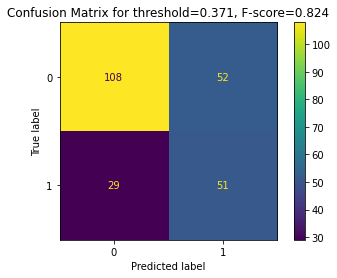

              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       160
         1.0       0.50      0.64      0.56        80

    accuracy                           0.66       240
   macro avg       0.64      0.66      0.64       240
weighted avg       0.69      0.66      0.67       240



In [41]:
fthreshold = 0.4

y_pred = (y_pred_prob >= fthreshold).astype('int')

cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for threshold=0.371, F-score=0.824')
plt.show()
print(classification_report(y_test, y_pred))

Logistic Regression seems to perform better than the Random Forest Classifier as expected at a lower threshold. However, 50% precision and 64% recall is still not enough to deem this model useful.